In [59]:
import pyabf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [60]:
# Import file
file_name = "data/2021_05_08_0001.abf"
abf = pyabf.ABF(file_name)

## 1. Sweep Visualization

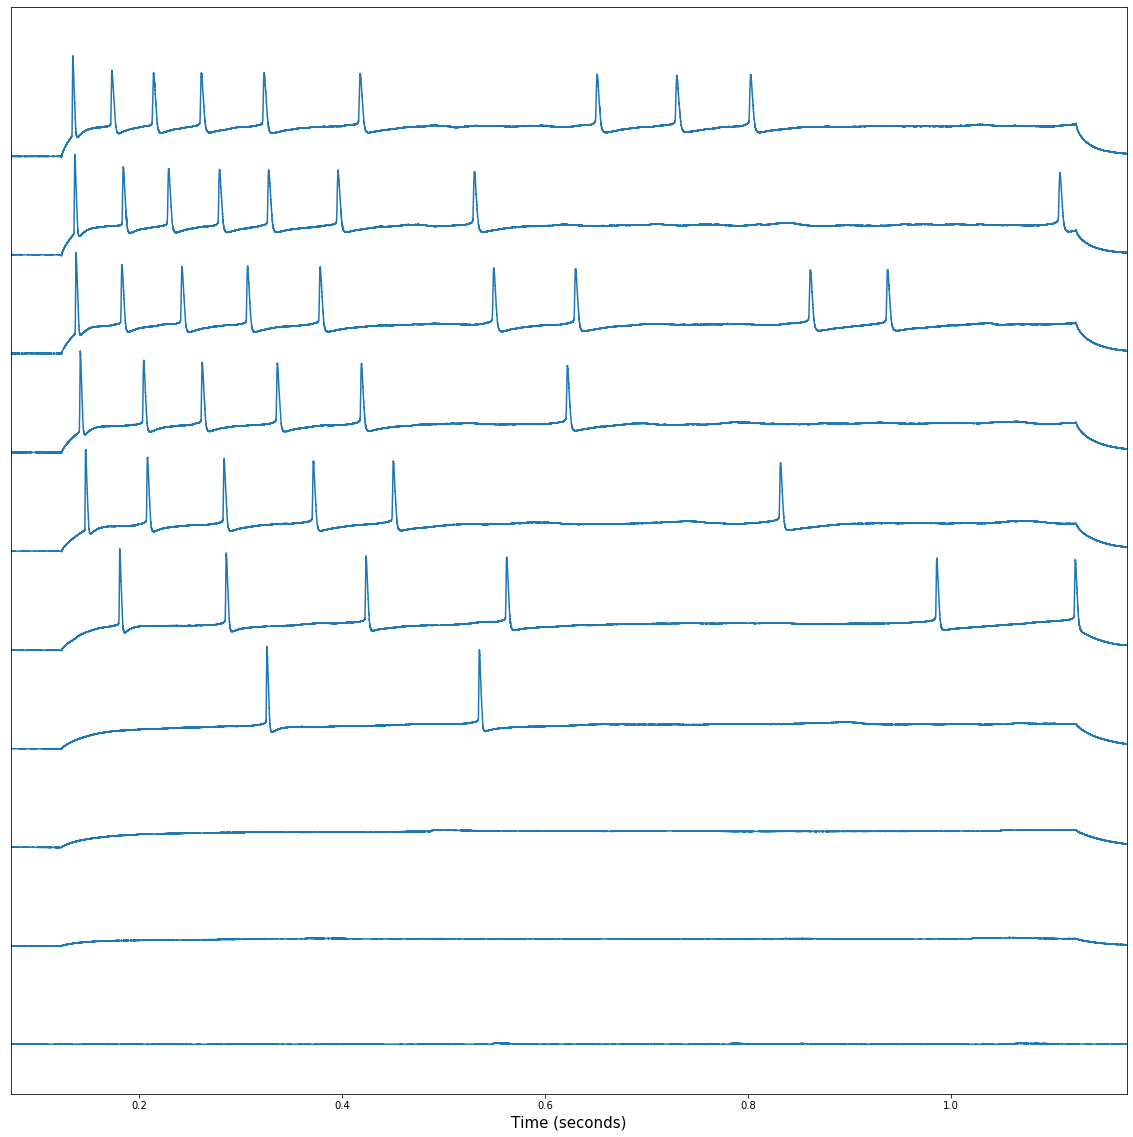

In [61]:
plt.figure(figsize=(20, 20))
# Sample one in five sweeps
sample_sweeps = [i for i in abf.sweepList if i%5== 0]
# Visualize sample sweeps
for sweepNumber in sample_sweeps:
    if sweepNumber % 5 == 0:
        abf.setSweep(sweepNumber, channel=0)
        offset = 25*sweepNumber
        plt.plot(abf.sweepX, abf.sweepY+offset, color='C0')
    if sweepNumber == sample_sweeps[-1]:
        abf.setSweep(sweepNumber, channel=1)
        _, start, end = utils.measure_current(abf)

plt.gca().get_yaxis().set_visible(False)
plt.xlabel(abf.sweepLabelX, fontsize=15)
plt.xticks(fontsize = 10)
plt.xlim(start-0.05, end+0.05)
plt.show()

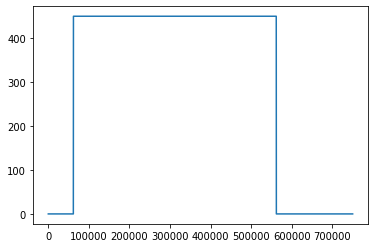

In [62]:
plt.plot(abf.sweepC)

## 2. Count Action Potentials by Sweep

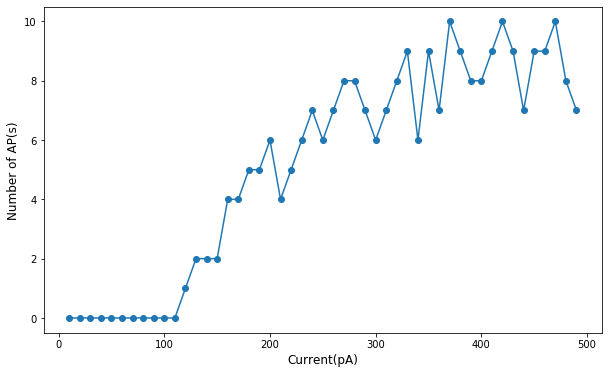

In [65]:
df_ap = utils.read_abf(file_name)
plt.figure(figsize=(10, 6))
plt.plot(df_ap["current_amplitude"], df_ap["in_cs_ap_count"], "-o")
plt.xlabel("Current(pA)", fontsize=12)
plt.ylabel("Number of AP(s)", fontsize=12)
plt.show()
#check stimulus level, adjust if it's not 10pA steps 
#for example, 2500/50

## 3. Derivatives Visualization

### 3.1 First AP

In [66]:
# Select an example
example = 27
time_window = 0.05
sampling_rate = 50

# Read trace file
abf.setSweep(example, channel=0)
time = abf.sweepX
trace = abf.sweepY

# Sample signals to reduce noise
ind_sample = np.where(np.arange(len(trace))%sampling_rate == 0)[0]
trace_ = pd.Series(trace[ind_sample])
time_ = pd.Series(time[ind_sample])

# Find action potential
ap_amplitude, ap_time = utils.find_ap(abf=abf, sampling_rate=sampling_rate)

# Find current step
abf.setSweep(example, channel=1)
current_amplitude, start, end = utils.measure_current(abf)

# Compute derivatives
abf.setSweep(example, channel=0)
rate, shape = utils.find_derivatives(abf, 
                                     ap_time, 
                                     cs_start=start, 
                                     cs_end=end,
                                     sampling_rate=sampling_rate)

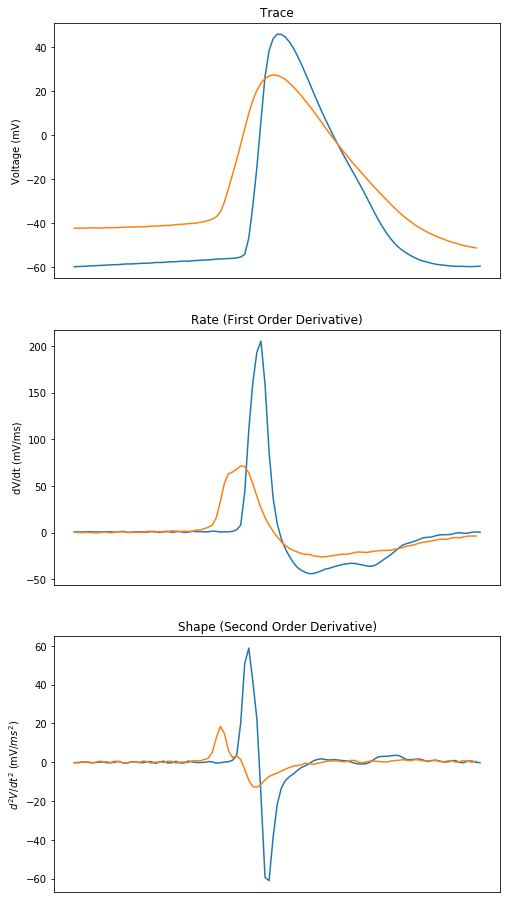

In [67]:
fig, axs = plt.subplots(3, figsize=(8, 16))
for i in [0, -1]:
    ap_time_ = pd.Series(ap_time)[(ap_time >= start) & (ap_time <= end)]
    time = ap_time_.iloc[i]
    ind = np.logical_and(time_ >= time-0.005, time_ <= time+0.005)
    # Trace
    axs[0].plot(trace_.values[ind])
    axs[0].get_xaxis().set_visible(False)
    axs[0].set_title("Trace")
    axs[0].set_ylabel("Voltage (mV)")
    axs[1].plot(rate.values[ind])
    axs[1].get_xaxis().set_visible(False)
    axs[1].set_title("Rate (First Order Derivative)")
    axs[1].set_ylabel("dV/dt (mV/ms)")
    axs[2].plot(shape.values[ind])
    axs[2].get_xaxis().set_visible(False)
    axs[2].set_title("Shape (Second Order Derivative)")
    axs[2].set_ylabel("$d^2V/dt^2$ (mV/$ms^2$)")

### 3.2 Phase Plot

In [68]:
# Select an example
example = 27
time_window = 0.05
sampling_rate = 50

# Read trace file
abf.setSweep(example, channel=0)
time = abf.sweepX
trace = abf.sweepY

# Sample signals to reduce noise
ind_sample = np.where(np.arange(len(trace))%sampling_rate == 0)[0]
trace_ = pd.Series(trace[ind_sample])
time_ = pd.Series(time[ind_sample])

# Find action potential
ap_amplitude, ap_time = utils.find_ap(abf=abf, sampling_rate=sampling_rate)

# Find current step
abf.setSweep(example, channel=1)
current_amplitude, start, end = utils.measure_current(abf)

# Compute derivatives
abf.setSweep(example, channel=0)
rate, shape = utils.find_derivatives(abf, 
                                     ap_time, 
                                     cs_start=start, 
                                     cs_end=end,
                                     sampling_rate=sampling_rate)

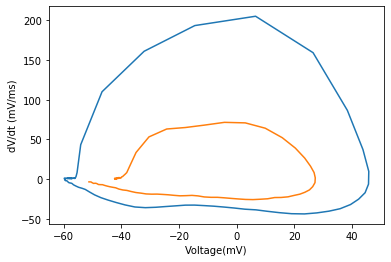

In [69]:
for i in [0, -1]:
    ap_time_ = pd.Series(ap_time)[(ap_time >= start) & (ap_time <= end)]
    time = ap_time_.iloc[i]
    ind = np.logical_and(time_ >= time-0.005, time_ <= time+0.005)
    # Need to adjust the scale based on sampling rate
    plt.plot(trace_.values[ind], rate.values[ind])
    plt.xlabel("Voltage(mV)")
    plt.ylabel("dV/dt (mV/ms)")

In [98]:
#sweep to be analyzed: the sweep that first reaches 80% of max AP number
#then analyze first and last AP

In [ ]:
#find rheobase: the stimulus level of first AP firing



#first AP: peak, threshold, width
